# **Reconhecimento de faces com Eigen Faces**

**Autores:**
<p>
Sophia S. Schuster  RA: 760936​<br>
Anderson H. Giacomini  RA: 769720
<p>

**Disciplina:**
<p>Visão Computacional​
<p>

**Slides com informações teóricas:** 
<p>
https://docs.google.com/presentation/d/175yuC98Q1a7Dpzo2WRMPArAFhNXkb9E-Zi42Oada2MM/edit?usp=sharing


# Criar uma base de dados de faces

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import tensorflow as tf
# Pegando as imagens que estão separas no drive como conjunto de treino
#https://keras.io/api/preprocessing/image/#flowfromdirectory-method
train_set = tf.keras.preprocessing.image_dataset_from_directory(
                                              '/content/drive/MyDrive/VC/dataset/treino',
                                              labels = "inferred",
                                              label_mode = "int",
                                              color_mode = "grayscale",
                                              shuffle = False)  # giving train data only 
# Tamanho padrão da imagem é (256, 256)
h = 256 
w = 256

Found 25 files belonging to 5 classes.


In [30]:
#criaremos uma lista com os nomes das classes usando o file_paths
train_set.file_paths

['/content/drive/MyDrive/VC/dataset/treino/Anderson/WhatsApp Image 2022-09-11 at 16.54.37 (1).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Anderson/WhatsApp Image 2022-09-11 at 16.54.37 (2).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Anderson/WhatsApp Image 2022-09-11 at 16.54.37 (3).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Anderson/WhatsApp Image 2022-09-11 at 16.54.37 (4).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Anderson/WhatsApp Image 2022-09-11 at 16.54.37.jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Bia/WhatsApp Image 2022-09-11 at 19.01.23.jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Bia/WhatsApp Image 2022-09-11 at 19.01.24 (1).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Bia/WhatsApp Image 2022-09-11 at 19.01.24 (2).jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Bia/WhatsApp Image 2022-09-11 at 19.01.24.jpeg',
 '/content/drive/MyDrive/VC/dataset/treino/Bia/WhatsApp Image 2022-09-11 at 19.01.25 (1).jpeg',
 '/content/drive/MyDrive/VC

In [31]:
def remove_repetidos(lista):
  l = []
  for i in lista:
    if i not in l:
      l.append(i)
  return l

nomes = []
for p in train_set.file_paths:
  nomes.append(p.split('/')[-2])
nomes = remove_repetidos(nomes)

nomes

['Anderson', 'Bia', 'Jadson', 'Rodrigo', 'Sophia']

In [32]:
# Pegando as imagens que estão separas no drive como conjunto de teste
test_set = tf.keras.preprocessing.image_dataset_from_directory(
                                              '/content/drive/MyDrive/VC/dataset/teste',
                                              labels = "inferred",
                                              label_mode = "int", 
                                              color_mode = "grayscale",
                                              shuffle = False
                                              )  # giving train data only 

Found 5 files belonging to 5 classes.


# Implementar em Python

#### #1 Divide em treino e teste

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


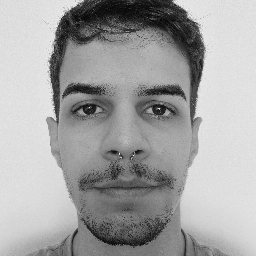

Shape:
(256, 256, 1)


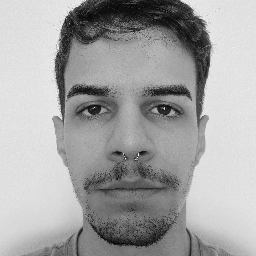

Shape:
(256, 256, 1)


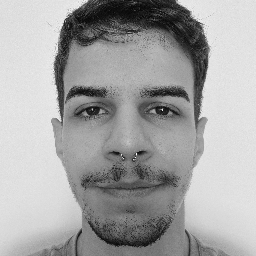

Shape:
(256, 256, 1)


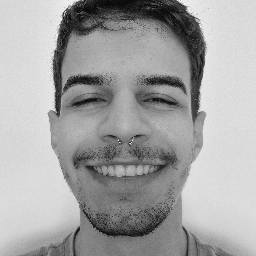

Shape:
(256, 256, 1)


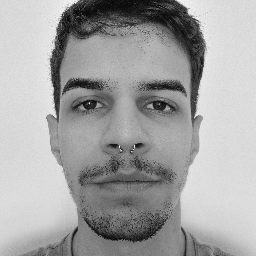

Shape:
(256, 256, 1)


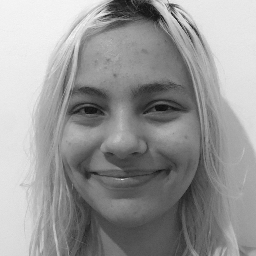

Shape:
(256, 256, 1)


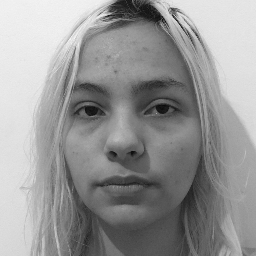

Shape:
(256, 256, 1)


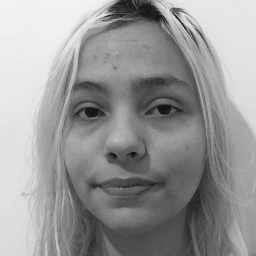

Shape:
(256, 256, 1)


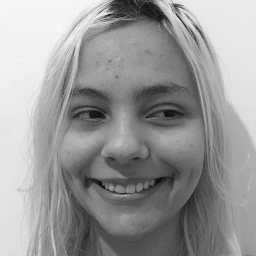

Shape:
(256, 256, 1)


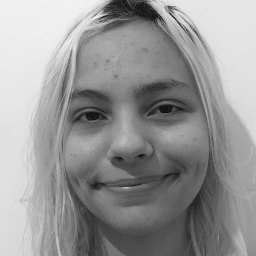

Shape:
(256, 256, 1)


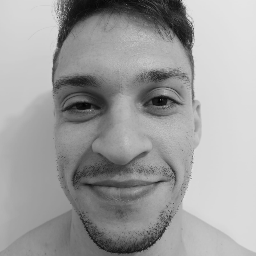

Shape:
(256, 256, 1)


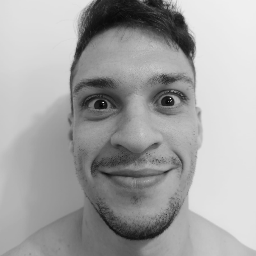

Shape:
(256, 256, 1)


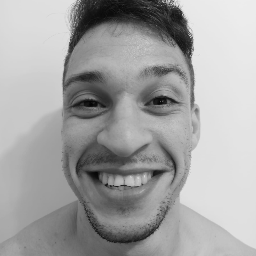

Shape:
(256, 256, 1)


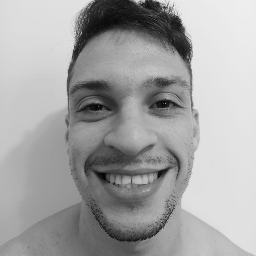

Shape:
(256, 256, 1)


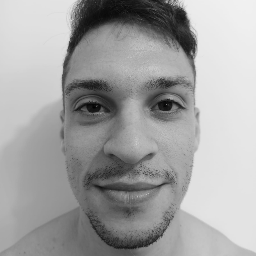

Shape:
(256, 256, 1)


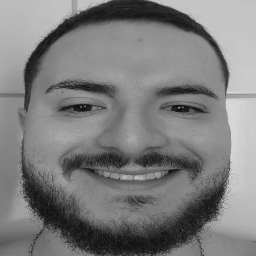

Shape:
(256, 256, 1)


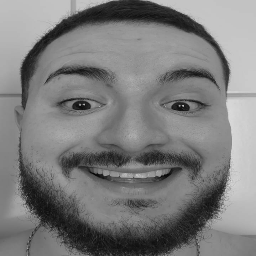

Shape:
(256, 256, 1)


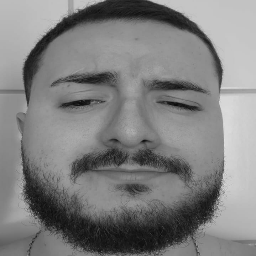

Shape:
(256, 256, 1)


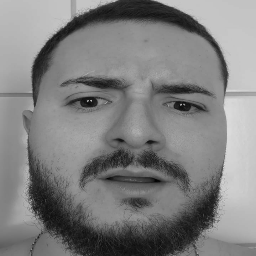

Shape:
(256, 256, 1)


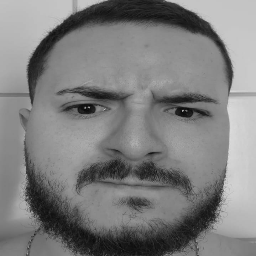

Shape:
(256, 256, 1)


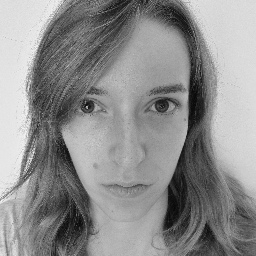

Shape:
(256, 256, 1)


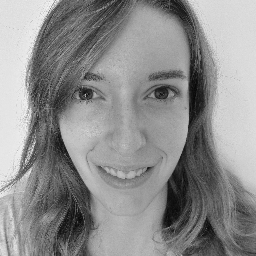

Shape:
(256, 256, 1)


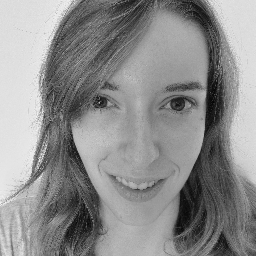

Shape:
(256, 256, 1)


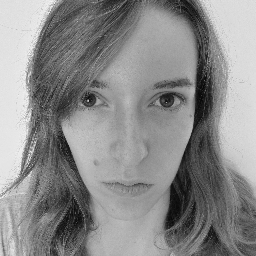

Shape:
(256, 256, 1)


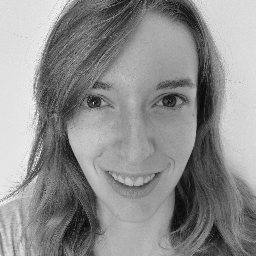

Shape:
(256, 256, 1)


In [33]:
from google.colab.patches import cv2_imshow
import numpy as np

X_train = []
n_samples = 0
#Dividimos novamente pois a função do keras cria tuplas e não queremos tuplas. 
#train_set é uma tupla (images, labels)
#Queremos y_train com labels e x_train com as imagens.
for element in train_set.as_numpy_iterator(): 
  n_samples += len(element[1])
  y_train = element[1]
  #segundo elemento da tupla, labels
  print(element[1]) 
  for img in element[0]: 
    #element[0] é o primeiro elemento da tupla, portanto guarda as imagens
    X_train.append(np.array(img[:,:,0]).flatten()) 
    # muda o formato para tirar a dimensao do numpy que vem pelo load de imagem do keras
    # o flatten transforma de matriz em vetor. 
    cv2_imshow(img)
    print("Shape:")
    print(img.shape)

X_train = np.array(X_train)

[0 1 2 3 4]


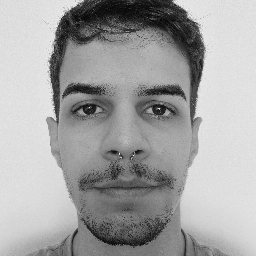

Shape:
(256, 256, 1)


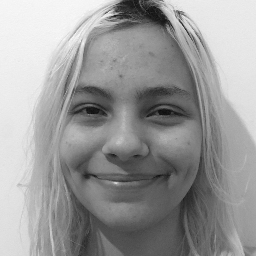

Shape:
(256, 256, 1)


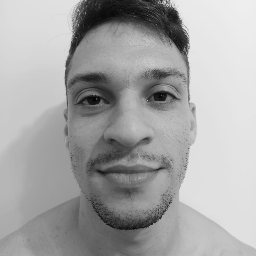

Shape:
(256, 256, 1)


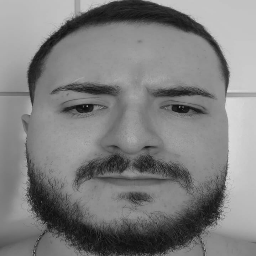

Shape:
(256, 256, 1)


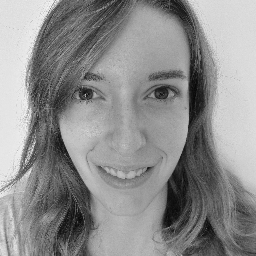

Shape:
(256, 256, 1)


In [34]:
X_test = []
#repete o processo para as imagens de teste
for element in test_set.as_numpy_iterator(): 
  print(element[1]) 
  y_test = element[1]
  for img in element[0]: 
    X_test.append(np.array(img[:,:,0]).flatten())
    cv2_imshow(img)
    print("Shape:")
    print(img.shape)

X_test = np.array(X_test)

Agora calculamos a média de todos esses vetores/imagens de treino de face

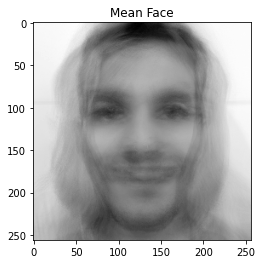

In [35]:
import matplotlib.pyplot as plt

mean_face_vector = np.reshape(X_train.mean(axis = 0), X_train[0].shape)
# como cada imagem é uma linha no caso do nosso algoritmo, o axis = 0 faz pegar a media das linhas pelas colunas, ou seja, entre as imagens

plt.imshow(mean_face_vector.reshape(h, w), cmap = 'gray')
plt.title("Mean Face")
plt.show()


# Calculo do PCA dos rostos (eigenfaces)

Agora subtraimos o rosto médio de cada rosto do conjunto de treino, com isso teremos uma imagem que destaca as diferenças. Destacando as variações de forma que fiquem mais claras.

In [36]:
# Joga os dados no centro, com a normalização, para calcular a diferença

normalised_X_train = np.ndarray(shape=(n_samples, h * w))
print(normalised_X_train.shape)
for i in range(n_samples):
    normalised_X_train[i] = np.subtract(X_train[i], mean_face_vector)

(25, 65536)


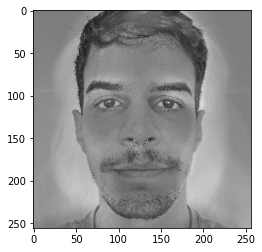

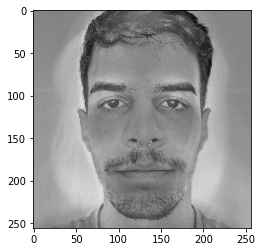

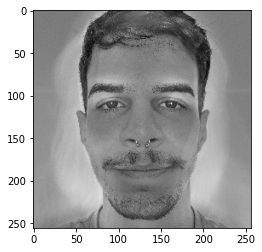

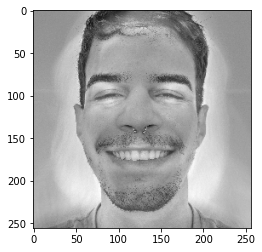

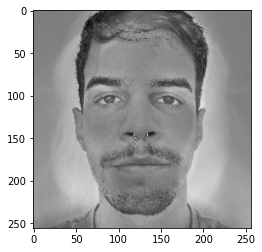

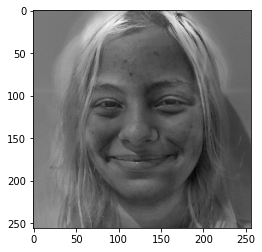

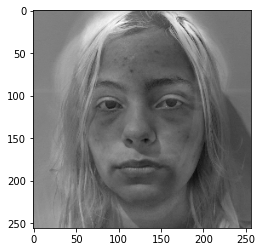

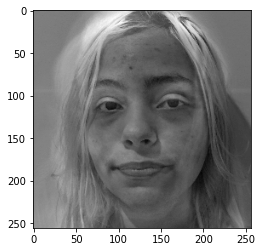

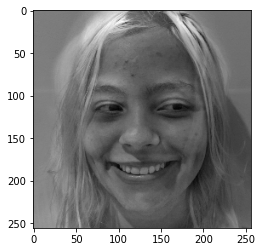

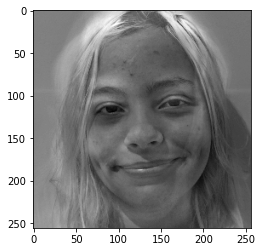

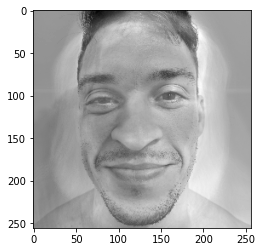

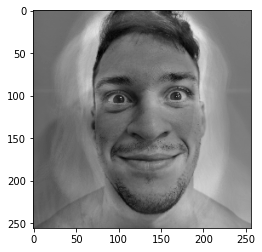

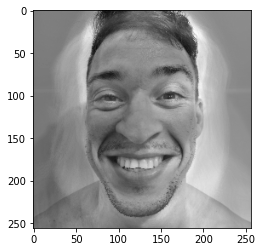

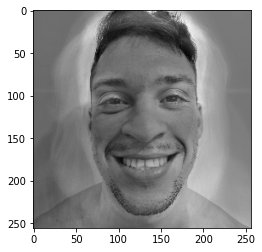

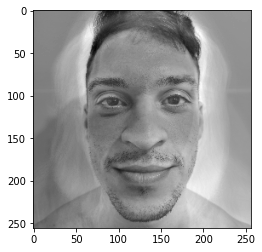

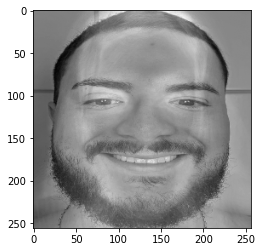

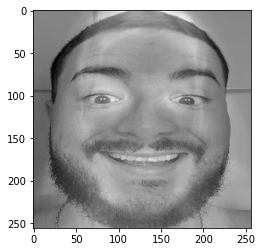

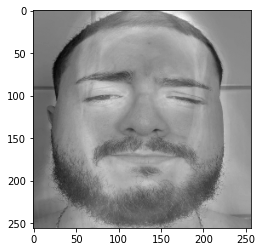

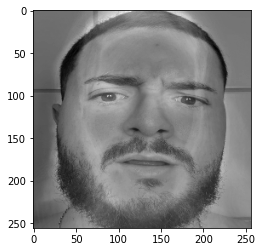

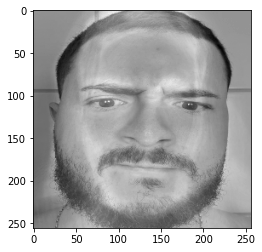

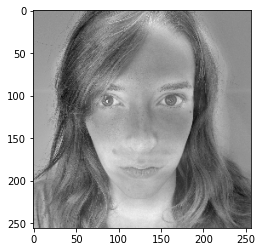

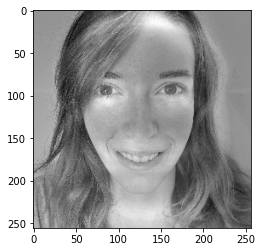

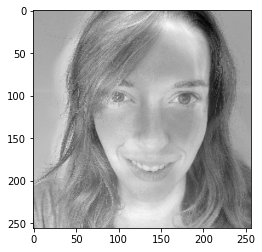

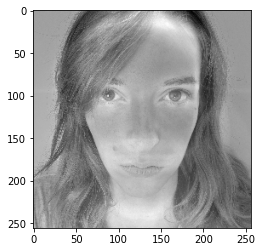

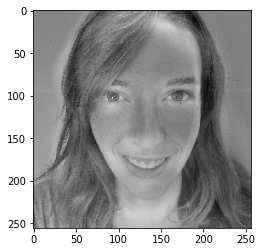

In [37]:
for img in normalised_X_train: 
  plt.imshow(img.reshape(h, w), cmap=plt.cm.gray)
  plt.show()
#Temos os PCs:

Calculamos então os autovalores e autovetores (eigenvalues e eingenvectors) da matriz de covariancia. 

Informações a respeito dos termos nos slides. 

In [38]:
normalised_X_train_array = normalised_X_train.reshape(n_samples, h * w)

cov_matrix = np.cov(normalised_X_train_array) # matriz de covariância A * A^t 
# A é [M, N²], logo A * A^t = [M, M]
# caso as imagens estivessem em colunas, usaríamos A^t * A
# senão obteríamos uma matriz N²N² e o custo para colcular os PCs seria absurdo
print('Matriz de Covariancia de X: \n%s' %cov_matrix) 

#Temos 25 valores dentro de cada subvetor da matriz, cada um desses valores representa a covariancia (relação )entre 2 imagens de treino. 
#Valores maiores significam mais semelhança entre as imagens.

Matriz de Covariancia de X: 
[[ 1.41524961e+03  9.62588635e+02  1.06101136e+03  8.59520739e+02
   1.09543835e+03 -3.35952168e+02 -3.55419818e+02 -3.79574624e+02
  -3.48544315e+02 -3.76828777e+02  4.30500499e+02  3.31868514e+02
   3.69793595e+02  3.27966604e+02  4.92428311e+02 -4.64732683e+02
  -5.14071196e+02 -4.15567253e+02 -4.39681708e+02 -3.40110891e+02
  -5.47518836e+02 -6.43697164e+02 -6.62358873e+02 -8.24370498e+02
  -6.97937410e+02]
 [ 9.62588635e+02  1.48991193e+03  1.28200982e+03  7.69295002e+02
   8.35696403e+02 -2.90166378e+02 -3.14029381e+02 -3.08246462e+02
  -2.81972639e+02 -3.21811027e+02  2.24326917e+02  2.14556506e+02
   2.00847238e+02  1.71876553e+02  3.84405540e+02 -4.42741129e+02
  -4.92406086e+02 -4.13843915e+02 -4.03421278e+02 -2.72054285e+02
  -5.69403419e+02 -6.22435605e+02 -6.23643256e+02 -6.50952997e+02
  -5.28386690e+02]
 [ 1.06101136e+03  1.28200982e+03  1.46343169e+03  8.01066340e+02
   8.76586829e+02 -2.70782125e+02 -2.95124616e+02 -2.89093191e+02
  -2.5251

In [39]:
# Calcula os eigenvalues e eigenvectors

eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors da matriz de covariância de X: \n%s' %eigenvectors)
print('\nEigenvalues matriz de covariância de X: \n%s' %eigenvalues)

Eigenvectors da matriz de covariância de X: 
[[-2.38613489e-01 -3.85033417e-02 -2.25841591e-01  1.95804188e-01
   8.48996841e-03  2.10350889e-02  4.79452526e-02 -3.68739322e-01
  -2.80654459e-01 -2.00000003e-01 -1.76657908e-01 -4.15418204e-01
  -1.39069087e-02 -1.71704847e-03 -3.76000547e-03  9.09592733e-02
  -2.17526174e-01  9.41230772e-02  3.33663075e-01  1.50986512e-01
   3.91868650e-01  9.62253981e-03 -1.11612828e-01  1.61242936e-01
  -2.99867077e-03]
 [-2.10646622e-01 -5.26760049e-02 -2.28090558e-01  2.94912528e-01
   2.91994052e-02 -4.24146134e-01  3.20080772e-02  3.23848518e-01
   1.49709827e-02 -2.00000005e-01  7.02871658e-02  1.37472050e-01
  -1.28725603e-01 -4.56475941e-03  4.23071705e-02 -1.77434066e-02
   6.39894581e-02  1.29040424e-02  4.66376332e-01  7.71738931e-02
  -2.83906569e-01  2.36719766e-01  1.42137915e-01 -1.89445452e-01
   1.54870821e-01]
 [-2.25818268e-01 -6.69189671e-02 -2.23797592e-01  2.78288589e-01
  -1.63156554e-02 -3.77502270e-01  3.61955858e-02  1.631041

In [40]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
# Junta autos valores e autovetores, para que possamos ordenar os eigenvalues sem perder seu eigenvector correspondente.
# Ordena os pares em ordem decrescente e depois separamos novamente mas com os eigenvectors e eigenvalues ja ordenados
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Encontra a proporção cumulativa de variação dos PCs

var_comp_sum[i] = ($\sum_{n=0}^{i}$ eigvalues_sort[n])/sum(eigvalues_sort)

É a soma cumulativa das porcentagens de variações, lembrando que a porcentagem de variação é dada pela divisão do autovalor pela soma de todos autovalores e as variações são dadas pelo somatório das distâncias das projeções no autovetor sobre o (no_amostragens - 1) 

Vetor de proporções de variancia acumuladas: 
[0.33415239 0.52245853 0.67689327 0.75763431 0.80614522 0.83721352
 0.85747603 0.87506456 0.89055419 0.9036222  0.91507739 0.92617255
 0.93572092 0.94459426 0.95321653 0.96034936 0.96658838 0.97266469
 0.97806165 0.98343486 0.98856985 0.99327971 0.99768563 1.
 1.        ]


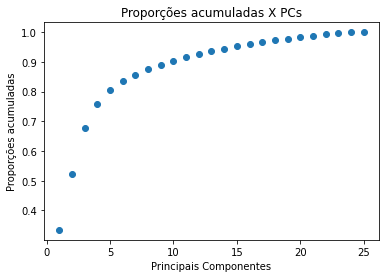

In [41]:
var_comp_sum = np.cumsum(eigvalues_sort)/np.sum(eigvalues_sort) #porcentagem de variação

# Exibe proporção cumulativa de variação em relação aos componentes (autovalores)
print("Vetor de proporções de variancia acumuladas: \n%s" %var_comp_sum)

# Exibe no gráfico
num_comp = range(1, len(eigvalues_sort) + 1)
plt.title('Proporções acumuladas X PCs')
plt.xlabel('Principais Componentes')
plt.ylabel('Proporções acumuladas')

plt.scatter(num_comp, var_comp_sum)
plt.show()

# Seleciona as componentes mais representativas

In [42]:
# Representatividade que deseja-se alcançar 
rep_desejada = 0.9

n_PC = 0
for i in var_comp_sum:
  if (i < rep_desejada):
    n_PC += 1
n_PC

9

In [43]:
# Pega os eigenvectors mais importantes, é possivel pegar dessa maneira pois os dados estão ordenados em ordem decrescente. 
reduced_data = np.array(eigvectors_sort[:n_PC])

In [44]:
# Projeta as imagens de treino nas novas dimensões
proj_data = np.dot(reduced_data, X_train)

# Exibe as Eigenfaces

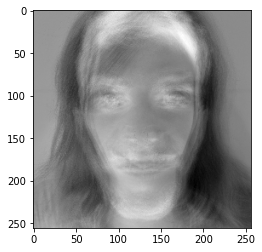

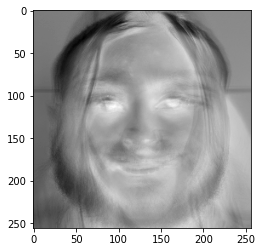

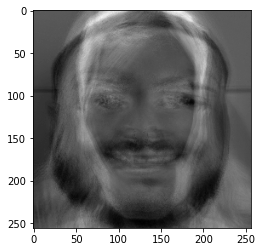

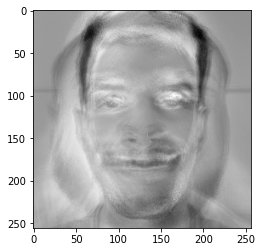

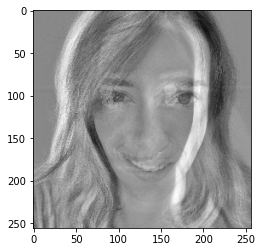

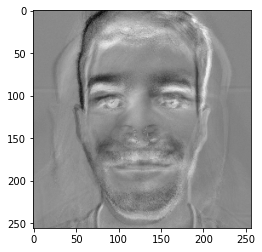

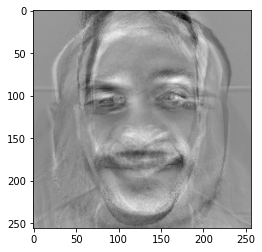

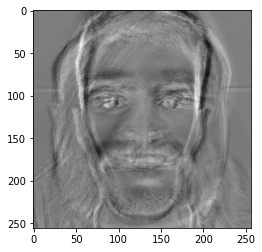

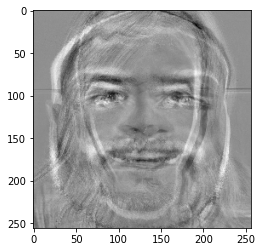

In [45]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(h,w)
    plt.imshow(img, cmap = 'gray')
    plt.show()


# Encontra os pesos para cada imagem do treino

In [46]:
w = np.array([np.dot(proj_data, i) for i in normalised_X_train])
w

array([[-2.38201054e+08, -5.22949839e+07, -1.17116443e+08,
         1.97193499e+07, -4.97754697e+04,  1.32724683e+06,
         1.52468424e+05, -1.37940650e+07, -9.39071196e+06],
       [-2.16984104e+08, -5.96032846e+07, -1.18814593e+08,
         3.84532729e+07,  2.33453743e+06, -3.18742951e+07,
        -6.78971747e+05,  1.54883749e+07,  1.62646833e+06],
       [-2.31381516e+08, -6.77016822e+07, -1.18813990e+08,
         3.43641396e+07, -3.01417574e+06, -2.84077440e+07,
        -5.79082114e+05,  8.78714187e+06, -2.39377037e+06],
       [-2.08680693e+08, -3.49593115e+07, -1.14237437e+08,
         2.20234082e+07, -3.43099242e+06,  3.50871775e+07,
        -1.55546520e+07,  5.43975598e+06,  1.04921214e+07],
       [-2.22610200e+08, -3.88690251e+07, -1.17800870e+08,
         2.29165294e+07,  1.24998895e+05,  2.41830766e+07,
        -6.57139470e+06, -1.09189084e+07,  2.97390915e+06],
       [ 5.57769490e+07, -1.60219224e+08,  4.87834643e+07,
        -4.01148673e+06, -8.70169989e+06,  4.884815

# Definimos funções para reconhecer uma face 

In [47]:
def dist_metric(p, q): # calcula a distancia entre dois vetores de pesos
  return np.sqrt(np.sum(np.power((p - q), 2)))

def predict(imgem):
  plt.subplot(1, 2, 1)
  plt.imshow(imgem.reshape((256,256)), cmap = 'gray')
  n_img = imgem - mean_face_vector
  plt.subplot(1, 2, 2)
  plt.imshow(n_img.reshape((256,256)), cmap = 'gray')
  plt.show()
  w_u = np.dot(proj_data, n_img) # encontra os pesos do teste
  minDist = float("inf")
  minClass = -1
  c = 0
  for i in w: # seleciona o vetor de peso mais semelhante (com menor distância)
      dist = dist_metric(i, w_u)
      if dist < minDist:
          minDist = dist
          minClass = y_train[c]
      c += 1
  return nomes[minClass]

def compred(pred, y_nome): # compara os resultados
  if pred == y_nome:
    print("Acertou!!")
  else:
    print("Errou!!")
  print("classe esperada: ", y_nome, "\nclasse predita: ", pred)

# Ter uma base de testes para verificar a implementação 

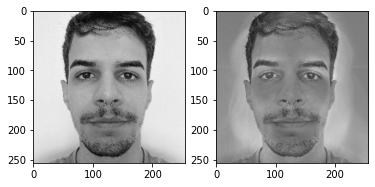

Acertou!!
classe esperada:  Anderson 
classe predita:  Anderson


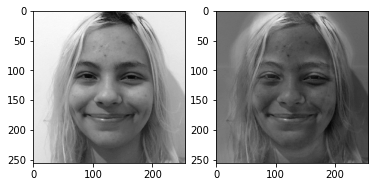

Acertou!!
classe esperada:  Bia 
classe predita:  Bia


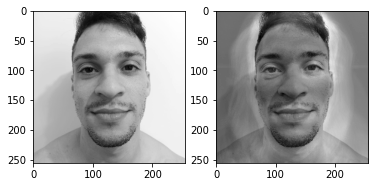

Acertou!!
classe esperada:  Jadson 
classe predita:  Jadson


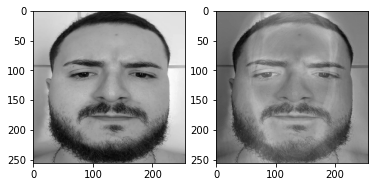

Acertou!!
classe esperada:  Rodrigo 
classe predita:  Rodrigo


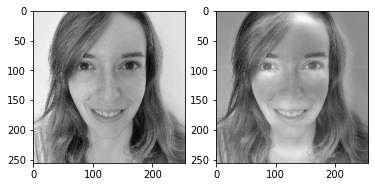

Acertou!!
classe esperada:  Sophia 
classe predita:  Sophia


In [48]:
# Cada classe possui uma imagem de teste
# Testamos todas elas
count = 0

for i in X_test:
  compred(predict(i), nomes[y_test[count]])
  count += 1

# Teste com ruído

In [49]:
#Aplicamos ruido as imagens
def noisy(type, image):
  row, col = image.shape
  if type == "sp":
    prob = 0.02
    noisy = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                noisy[i][j] = 0
            elif rdn > thres:
                noisy[i][j] = 255
            else:
                noisy[i][j] = image[i][j]
  elif type == "speckle":
    gauss = np.random.randn(row,col)
    gauss = gauss.reshape(row,col)        
    noisy = image + image * gauss
  else:
    return image
  return noisy

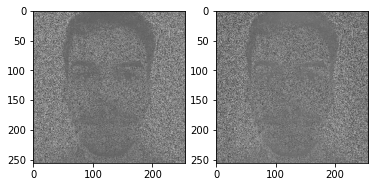

Acertou!!
classe esperada:  Anderson 
classe predita:  Anderson


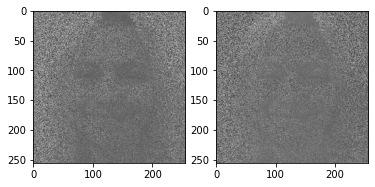

Acertou!!
classe esperada:  Bia 
classe predita:  Bia


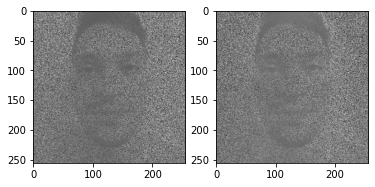

Acertou!!
classe esperada:  Jadson 
classe predita:  Jadson


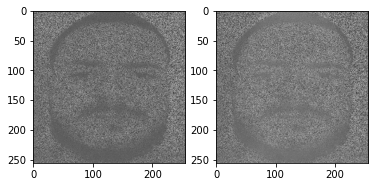

Acertou!!
classe esperada:  Rodrigo 
classe predita:  Rodrigo


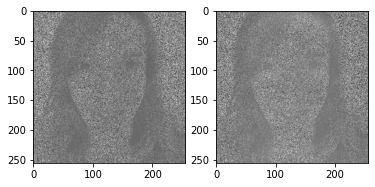

Acertou!!
classe esperada:  Sophia 
classe predita:  Sophia


In [50]:
count = 0
for i in X_test:
  noise_img = noisy("speckle", i.reshape((256,256)))
  compred(predict(noise_img.flatten()), nomes[y_test[count]])
  count += 1

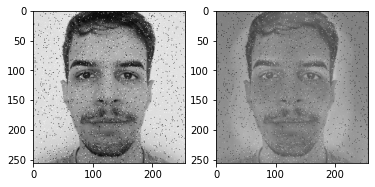

Acertou!!
classe esperada:  Anderson 
classe predita:  Anderson


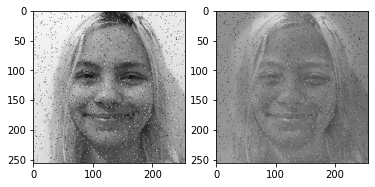

Acertou!!
classe esperada:  Bia 
classe predita:  Bia


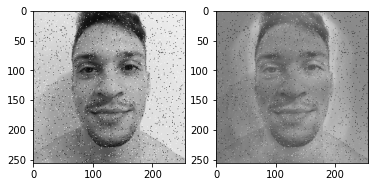

Acertou!!
classe esperada:  Jadson 
classe predita:  Jadson


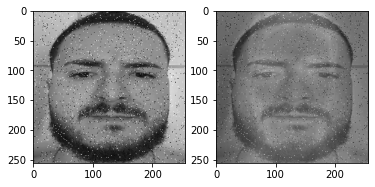

Acertou!!
classe esperada:  Rodrigo 
classe predita:  Rodrigo


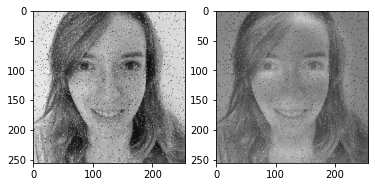

Acertou!!
classe esperada:  Sophia 
classe predita:  Sophia


In [51]:
# aplicamos ruidos salt and pepper as imagens

count = 0
for i in X_test:
  noise_img = noisy("sp", i.reshape((256,256)))
  compred(predict(noise_img.flatten()), nomes[y_test[count]])
  count += 1

# Reconstrução da imagem usando os pesos

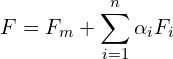

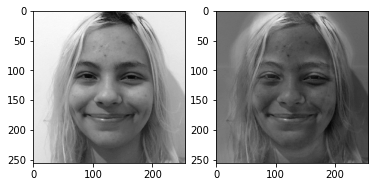

[ 5.77075994e+07 -1.65364143e+08  4.94461252e+07 -2.12889360e+06
 -8.63111985e+06  1.38015242e+06  6.04218252e+05  9.89808205e+05
 -2.85435547e+05]


In [52]:
img = X_test[1]
plt.subplot(1, 2, 1)
plt.imshow(img.reshape((256,256)), cmap = 'gray')
n_img = img - mean_face_vector
plt.subplot(1, 2, 2)
plt.imshow(n_img.reshape((256,256)), cmap = 'gray')
plt.show()
w_u = np.dot(proj_data, n_img)
print(w_u)

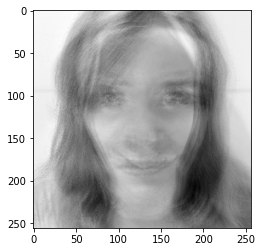

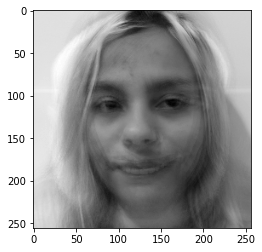

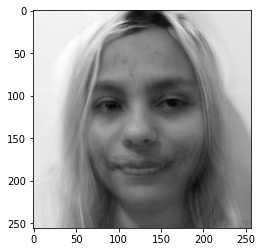

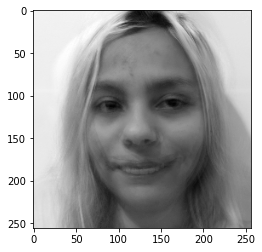

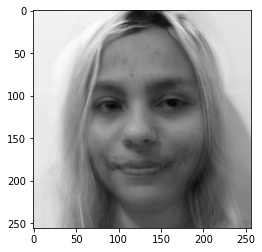

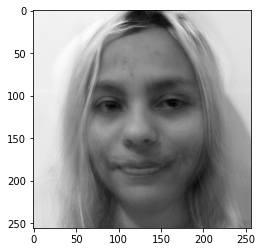

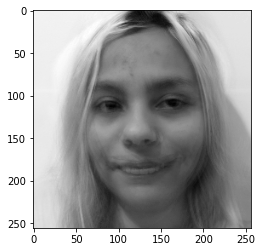

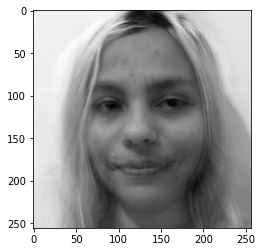

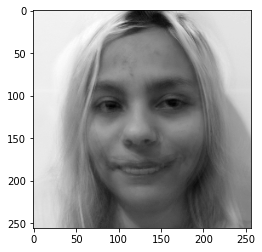

In [53]:
count = 0
sum = 0
for i in proj_data:
  sum += np.dot(i, w_u[count])
  res = ((((sum)*255)/(max(sum)-min(sum))) + mean_face_vector).reshape((256,256))#sum+mean_face_vector
  plt.imshow(res, cmap = 'gray')
  plt.show()
  count += 1

# Referencias

**Códigos utilizados para estudos:**

https://github.com/svetlana-topalova/eigenfaces/blob/master/Eigenfaces.ipynb

https://www.lcg.ufrj.br/marroquim/courses/cos756/trabalhos/2013/abel-nascimento/abel-nascimento-report.pdf

https://acervolima.com/ml-reconhecimento-de-face-usando-eigenfaces-algoritmo-pca/

https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

https://colab.research.google.com/github/AnaHristian/intro_to_machine_learning/blob/master/eigenfaces.ipynb#scrollTo=jFcCrwWVFnhZ

 https://github.com/vutsalsinghal/EigenFace/blob/master/Face%20Recognition.ipynb

**Videos e leituras utilizadas como fonte de estudos:**

PCA:

https://www.youtube.com/watch?v=_lY74pXWlS8 ,

 https://www.youtube.com/watch?v=FgakZw6K1QQ&t=1s ,

 https://www.youtube.com/watch?v=HMOI_lkzW08 ,

 https://www.youtube.com/watch?v=HofAwee9mKY

 Eigen Faces:

 https://www.youtube.com/watch?v=jQOZrXZTXcw ,

 https://www.youtube.com/watch?v=_lY74pXWlS8,

 https://laid.delanover.com/explanation-face-recognition-using-eigenfaces/,

 http://www.scholarpedia.org/article/Eigenfaces,

 https://learnopencv.com/face-reconstruction-using-eigenfaces-cpp-python/, 

 https://www.youtube.com/watch?v=YVfI-NeoyEc

